# PROPAGAÇÃO DAS INCERTEZAS EM APRENDIZAGEM PROFUNDA
O Dataset escolhido foi Airfoil Self-Noise Data Set (http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise ) retirado do UCL Machine Learn Repository. A variável predita escolhida foi a "Pressure" e todas as demais foram consideradas como variáveis preditoras. 


# Manipulando os dados 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn

%matplotlib inline
%reload_ext autoreload
%autoreload 2


# Importando os dados  

In [4]:
df=pd.read_csv('airfoil.csv')

In [5]:
df

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


# Normalização dos dados 

In [6]:
from sklearn.preprocessing import MinMaxScaler 

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
df_n = scaler.fit_transform(df)


In [8]:
df_n=pd.DataFrame(df_n)

# Divisão dos dados em entradas (x) e saída (y) em dados de teste e treino

In [9]:
y=df_n[5]

In [10]:
X=df_n[df_n.columns[0:5]]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=True, random_state=32)

In [12]:
X_test

,0,1,2,3,4
1154,0.040404,0.783784,0.000000,1.000000,0.270697
475,0.116162,0.000000,0.454545,0.601010,0.022858
458,0.090909,0.000000,0.454545,1.000000,0.020653
43,0.242424,0.000000,1.000000,0.199495,0.046555
533,0.116162,0.121622,0.454545,0.199495,0.043912
1366,0.070707,0.301802,0.272727,0.199495,0.092743
537,0.308081,0.121622,0.454545,0.199495,0.043912
273,0.015152,0.090090,0.727273,0.199495,0.052836
428,0.030303,0.328829,0.727273,0.199495,0.205952
381,0.040404,0.238739,0.727273,0.199495,0.098992


# Construção da rede neural 

In [13]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

In [14]:
n_input = 5  # numero de entradas das rede neural 
num_out = 1
p_dropout = 0.5 # probabilidade dropout 

lbd = 1e-4  # L2- força de regularização 

model = Sequential()
model.add(Dropout(.05, input_shape=(n_input,)))
model.add(Dense(100, activation='relu', input_shape=(n_input,), kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(100, activation='relu', kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(num_out, activation=None))
model.summary()

opt = Adam(lr=1e-3) 

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 100)               600       
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-traina

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Treino da rede neural

In [15]:
epochs = 10000
model.fit(X_train, y_train,
            batch_size=X_train.shape[0] // 1,
            epochs=epochs,
            verbose=0)

# Avaliaçao da performance do modelo 

In [16]:
from sklearn import metrics

y_hat_train = model.predict(X_train)


46/46 [==============================] - 0s 722us/step


In [17]:
y_hat_test = model.predict(X_test)


1/1 [==============================] - 0s 44ms/step


# Métricas do treino

In [18]:
MAE_T=metrics.mean_absolute_error(y_train, y_hat_train)
R2_T=metrics.r2_score(y_train, y_hat_train);
RMSE_T=metrics.mean_squared_error(y_train, y_hat_train)

In [19]:
MAE_T,R2_T,RMSE_T

(0.048082076014955795, 0.8752689287290599, 0.004229095111439981)

# Métricas do teste

In [20]:
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)

In [21]:
MAE_t,R2_t,RMSE_t

(0.04459676221960383, 0.8479052198894722, 0.00306728942570912)

# Determinação do erro aleatório e erro sistemático em todo o dataset

In [22]:
previsão=model.predict(X[:1503])

47/47 [==============================] - 0s 565us/step


In [23]:
colnames=["Predict2"]

previsão2=pd.DataFrame(previsão, columns=colnames)

df.resume4=pd.concat([X,y,previsão2],axis=1)

erro=df.resume4['Predict2']-df.resume4[5]

erro.describe()

es=erro.loc[:,].mean()

ea=erro.loc[:,].std()


C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_3192\3222474720.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume4=pd.concat([X,y,previsão2],axis=1)


In [24]:
ea

0.06455371030333577

In [25]:
es

0.006381489504042621

In [26]:
erro.describe()

count    1503.000000
mean        0.006381
std         0.064554
min        -0.359911
25%        -0.029694
50%         0.006890
75%         0.042196
max         0.250366
dtype: float64

# Elaboração do gráfico ordenando os dados em ordem e plotando os valores reais e predito no conjunto de teste 

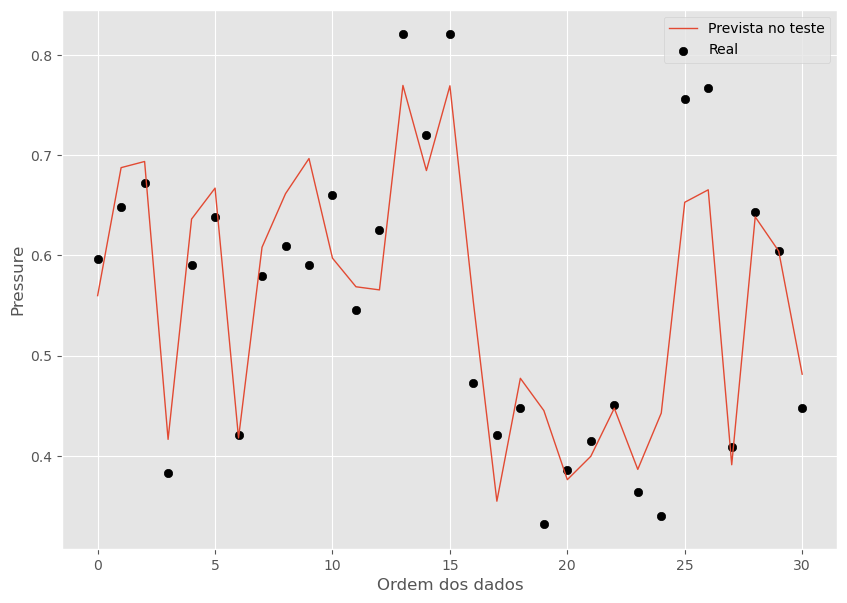

In [27]:
# avaliação conjunto de teste
n = 31
plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(range(n), y_hat_test, label="Prevista no teste", lw=1)
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

# Método JCGM 100: 2008 Propagação da distribuições pela rede

In [28]:
X_test=X_test.reset_index(drop=True)#resetando o indice dos valores aleatórios sorteados para teste

In [29]:
y_test=y_test.reset_index(drop=True)

In [30]:

 previsão=model.predict(X_test[:31])#criando a coluna de previsão dos valores de teste pelo modelo treinado


1/1 [==============================] - 0s 10ms/step


In [31]:
colnames=["Predict"]

In [32]:
previsão1=pd.DataFrame(previsão, columns=colnames)

In [33]:
df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_3192\3988421289.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)


In [34]:
df.resume3

,0,1,2,3,4,5,Predict
0,0.040404,0.783784,0.000000,1.000000,0.270697,0.596591,0.559749
1,0.116162,0.000000,0.454545,0.601010,0.022858,0.648363,0.687409
2,0.090909,0.000000,0.454545,1.000000,0.020653,0.671870,0.693554
3,0.242424,0.000000,1.000000,0.199495,0.046555,0.383147,0.416396
4,0.116162,0.121622,0.454545,0.199495,0.043912,0.590555,0.636120
5,0.070707,0.301802,0.272727,0.199495,0.092743,0.638046,0.666992
6,0.308081,0.121622,0.454545,0.199495,0.043912,0.420906,0.417807
7,0.015152,0.090090,0.727273,0.199495,0.052836,0.579068,0.607994
8,0.030303,0.328829,0.727273,0.199495,0.205952,0.609434,0.661435
9,0.040404,0.238739,0.727273,0.199495,0.098992,0.590342,0.696501


# Determinação das derivadas parcias pelo método das diferenças finitas

In [35]:
#criar a coluna de predict delta x1 

In [36]:
#incerteza de x1 (medidor de frequência) * h=ux1

In [37]:
h1=0.000001
h2=0.000001
h3=0.000001
h4=0.000001
h5=0.000001

In [38]:
deltax1=X_test[:31]+np.array([h1,0,0,0,0])

In [39]:
previsãodeltax1=model.predict(deltax1[:31])


1/1 [==============================] - 0s 12ms/step


In [40]:
colnames=["Predict Deltax1"]
previsãodeltax1=pd.DataFrame(previsãodeltax1, columns=colnames)

In [41]:
#criar a coluna de predict delta x2

In [42]:
#incerteza de x2 (medidor de ângulo)

In [43]:
deltax2=X_test[:31]+np.array([0,h2,0,0,0])

In [44]:
previsãodeltax2=model.predict(deltax2[:31])

1/1 [==============================] - 0s 12ms/step


In [45]:
colnames=["Predict Deltax2"]
previsãodeltax2=pd.DataFrame(previsãodeltax2, columns=colnames)

In [46]:
#criar a coluna de predict delta x3

In [47]:
#incerteza de x3 (medidor de comprimento)

In [48]:
deltax3=X_test[:31]+np.array([0,0,h3,0,0])

In [49]:
previsãodeltax3=model.predict(deltax3[:31])

1/1 [==============================] - 0s 10ms/step


In [50]:
colnames=["Predict Deltax3"]
previsãodeltax3=pd.DataFrame(previsãodeltax3, columns=colnames)

In [51]:
#criar a coluna de predict delta x4

In [52]:
#incerteza de x4 (medidor de velocidade).

In [53]:
deltax4=X_test[:31]+np.array([0,0,0,h4,0])

In [54]:
previsãodeltax4=model.predict(deltax4[:31])

1/1 [==============================] - 0s 16ms/step


In [55]:
colnames=["Predict Deltax4"]
previsãodeltax4=pd.DataFrame(previsãodeltax4, columns=colnames)

In [56]:
#criar a coluna de predict delta x5

In [57]:
#incerteza de x5 (medidor de sucção)

In [58]:
deltax5=X_test[:31]+np.array([0,0,0,0,h5])

In [59]:
previsãodeltax5=model.predict(deltax5[:31])

1/1 [==============================] - 0s 10ms/step


In [60]:
colnames=["Predict Deltax5"]
previsãodeltax5=pd.DataFrame(previsãodeltax5, columns=colnames)

In [61]:
df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_3192\2651709830.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)


In [62]:
df.total['c1']=(df.total['Predict Deltax1']-df.total['Predict'])/h1


In [63]:
df.total['c2']=(df.total['Predict Deltax2']-df.total['Predict'])/h2


In [64]:
df.total['c3']=(df.total['Predict Deltax3']-df.total['Predict'])/h3

In [65]:
df.total['c4']=(df.total['Predict Deltax4']-df.total['Predict'])/h4

In [66]:
df.total['c5']=(df.total['Predict Deltax5']-df.total['Predict'])/h5

In [67]:
df.total

,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5
0,0.596591,0.559749,0.559752,0.559748,0.559750,0.559749,0.559749,3.218651,-0.417233,1.311302,0.000000,-0.059605
1,0.648363,0.687409,0.687408,0.687409,0.687409,0.687409,0.687408,-1.013279,0.000000,-0.357628,0.000000,-0.715256
2,0.671870,0.693554,0.693555,0.693555,0.693554,0.693554,0.693555,0.178814,0.298023,-0.238419,0.000000,0.417233
3,0.383147,0.416396,0.416395,0.416396,0.416396,0.416396,0.416395,-0.804663,-0.298023,-0.149012,0.089407,-1.043081
4,0.590555,0.636120,0.636118,0.636120,0.636119,0.636120,0.636119,-1.370907,-0.238419,-0.357628,0.059605,-1.192093
5,0.638046,0.666992,0.666988,0.666992,0.666992,0.666992,0.666990,-3.635883,0.059605,-0.178814,0.119209,-1.788139
6,0.420906,0.417807,0.417806,0.417807,0.417807,0.417807,0.417805,-0.953674,-0.417233,-0.119209,0.059605,-2.205372
7,0.579068,0.607994,0.607999,0.607994,0.607994,0.607994,0.607995,4.947186,0.119209,0.059605,0.000000,0.834465
8,0.609434,0.661435,0.661432,0.661435,0.661435,0.661436,0.661435,-3.874302,-0.357628,-0.238419,0.178814,-0.357628
9,0.590342,0.696501,0.696498,0.696501,0.696501,0.696501,0.696501,-3.099442,-0.119209,-0.357628,0.119209,-0.357628


In [68]:
#cálculo da incerteza combinada : 
#x1: medidor de frequencia sonora.0,034% do valor médio da escala
#x2: medidor de angulo :0,4% do valor médio da escala
#x3: medidor de comprimento 0,14% do valor médio da escala
#x4: medidor de velocidade do vento Pesquisando a incerteza em tuneis de vento chega a 1,9% do valor médio da escala
#x5: medidor de sucção 10% do valor médio da escala
#y: pressão somora: 0,8% do valor médio da escala
 

In [69]:
upx1=0.0003468*0.5/2
upx2=0.00488*0.5/2
upx3=0.001470*0.5/2
upx4=0.01966*0.5/2
upx5=0.1*0.5/2
upy=0.008*0.5/2

# Determinação da correlação entre as variáveis de entrada 

In [70]:
df_n.rename(columns={
    0: 'Frequency',1:'Angle',2:'Length',3:'Velocity',4:'Suction Side',5:'Pressure'
   
},inplace=True)

In [71]:
correlation= df_n.corr()

In [72]:
correlation

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Suction Side,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Pressure,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [73]:
r_12=correlation['Frequency']['Angle']

In [74]:
r_13=correlation['Frequency']['Length']

In [75]:
r_14=correlation['Frequency']['Velocity']

In [76]:
r_15=correlation['Frequency']['Suction Side']

In [77]:
r_23=correlation['Angle']['Length']

In [78]:
r_24=correlation['Angle']['Velocity']

In [79]:
r_25=correlation['Angle']['Suction Side']

In [80]:
r_34=correlation['Length']['Suction Side']

In [81]:
r_35=correlation['Length']['Velocity']

In [82]:
r_45=correlation['Velocity']['Suction Side']

<AxesSubplot:>

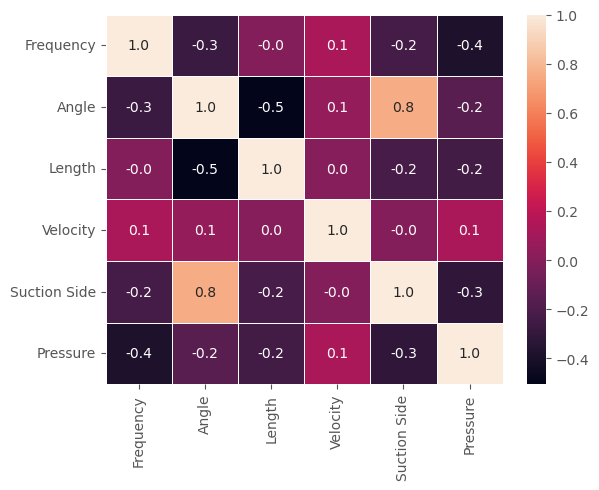

In [83]:
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

plot

# incerteza com correlação 

In [84]:
#incerteza combinada aleatória 
ucca=((df.total['c1']*upx1)**2+
                   (df.total['c2']*upx2)**2+
                   (df.total['c3']*upx3)**2+
                   (df.total['c4']*upx4)**2+
                   (df.total['c5']*upx5)**2+
      
      2*df.total['c2']*df.total['c5']*upx2*upx5*r_25+
     
                  +upy**2)**0.5

In [85]:
#incerteza epistêmica 
ucce=((ea)**2)**0.5

In [86]:
#incerteza combinada preditiva 
ucc=(ucca**2+ucce**2)**0.5

In [87]:
#Incerteza Expandida 95,45%
U= 2*ucc+abs(es)

In [88]:
df.total['ucca']=ucca
df.total['ucce']=ucce
df.total['ucc']=ucc
df.total['U']=U

In [89]:
df.total

,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,ucca,ucce,ucc,U
0,0.596591,0.559749,0.559752,0.559748,0.559750,0.559749,0.559749,3.218651,-0.417233,1.311302,0.000000,-0.059605,0.002816,0.064554,0.064615,0.135612
1,0.648363,0.687409,0.687408,0.687409,0.687409,0.687409,0.687408,-1.013279,0.000000,-0.357628,0.000000,-0.715256,0.017994,0.064554,0.067015,0.140411
2,0.671870,0.693554,0.693555,0.693555,0.693554,0.693554,0.693555,0.178814,0.298023,-0.238419,0.000000,0.417233,0.010893,0.064554,0.065466,0.137314
3,0.383147,0.416396,0.416395,0.416396,0.416396,0.416396,0.416395,-0.804663,-0.298023,-0.149012,0.089407,-1.043081,0.026432,0.064554,0.069755,0.145892
4,0.590555,0.636120,0.636118,0.636120,0.636119,0.636120,0.636119,-1.370907,-0.238419,-0.357628,0.059605,-1.192093,0.030091,0.064554,0.071222,0.148826
5,0.638046,0.666992,0.666988,0.666992,0.666992,0.666992,0.666990,-3.635883,0.059605,-0.178814,0.119209,-1.788139,0.044698,0.064554,0.078518,0.163418
6,0.420906,0.417807,0.417806,0.417807,0.417807,0.417807,0.417805,-0.953674,-0.417233,-0.119209,0.059605,-2.205372,0.055556,0.064554,0.085168,0.176718
7,0.579068,0.607994,0.607999,0.607994,0.607994,0.607994,0.607995,4.947186,0.119209,0.059605,0.000000,0.834465,0.021071,0.064554,0.067906,0.142193
8,0.609434,0.661435,0.661432,0.661435,0.661435,0.661436,0.661435,-3.874302,-0.357628,-0.238419,0.178814,-0.357628,0.009534,0.064554,0.065254,0.136889
9,0.590342,0.696501,0.696498,0.696501,0.696501,0.696501,0.696501,-3.099442,-0.119209,-0.357628,0.119209,-0.357628,0.009292,0.064554,0.065219,0.136820


# Simulação de Monte Carlo para os dados de teste

# simulação mc  v0 

In [91]:
i=0
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  # Matriz de covariância através da relação com a correlação
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC0=np.std(previsão)
MMC0=np.mean(previsão)

NameError: name 'r_as' is not defined

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v0')
plt.grid(True)
plt.show()

minvalue_IT0 = res.min()
print(minvalue_IT0)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v0')
plt.grid(True)
plt.show()


In [ ]:
sns.histplot(previsão,)


# Encontrar ymin e ymax 

In [ ]:
res_df[0].idxmin()

In [ ]:
pmin=x[res_df[0].idxmin()]
pmin

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

from scipy.interpolate import interp1d
inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_0= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_0= inverse_cdf(percentile2)

print(ymin_0)
print(ymax_0)


# simulação mc v1 

In [ ]:
i=1
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC1=np.std(previsão)
MMC1=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v1')
plt.grid(True)
plt.show()

minvalue_IT1 = res.min()
print(minvalue_IT1)


plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v1')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_1= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_1= inverse_cdf(percentile2)

print(ymin_1)
print(ymax_1)


# simulação mc v2 

In [ ]:
i=2
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC2=np.std(previsão)
MMC2=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v2')
plt.grid(True)
plt.show()

minvalue_IT2 = res.min()
print(minvalue_IT2)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v2')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_2= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_2= inverse_cdf(percentile2)

print(ymin_2)
print(ymax_2)


# simulação mc v3 

In [ ]:
i=3
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC3=np.std(previsão)
MMC3=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v3')
plt.grid(True)
plt.show()

minvalue_IT3 = res.min()
print(minvalue_IT3)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v3')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_3= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_3= inverse_cdf(percentile2)

print(ymin_3)
print(ymax_3)


# simulação mc v4

In [ ]:
i=4
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC4=np.std(previsão)
MMC4=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v4')
plt.grid(True)
plt.show()

minvalue_IT4 = res.min()
print(minvalue_IT4)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v4')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_4= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_4= inverse_cdf(percentile2)

print(ymin_4)
print(ymax_4)


# simulação mc v5 

In [ ]:
i=5
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC5=np.std(previsão)
MMC5=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v3')
plt.grid(True)
plt.show()

minvalue_IT5 = res.min()
print(minvalue_IT5)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v5')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_5= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_5= inverse_cdf(percentile2)

print(ymin_5)
print(ymax_5)

# simulação mc v6 

In [ ]:
i=6
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC6=np.std(previsão)
MMC6=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v6')
plt.grid(True)
plt.show()

minvalue_IT6 = res.min()
print(minvalue_IT6)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v6')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_6= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_6= inverse_cdf(percentile2)
print(ymin_6)
print(ymax_6)

# simulação mc v7 

In [ ]:
i=7
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC7=np.std(previsão)
MMC7=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v7')
plt.grid(True)
plt.show()

minvalue_IT7 = res.min()
print(minvalue_IT7)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v7')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_7= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_7= inverse_cdf(percentile2)
print(ymin_7)
print(ymax_7)

# simulação mc v8 

In [ ]:
i=8
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC8=np.std(previsão)
MMC8=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v8')
plt.grid(True)
plt.show()

minvalue_IT8 = res.min()
print(minvalue_IT8)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v8')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_8= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_8= inverse_cdf(percentile2)
print(ymin_8)
print(ymax_8)

# simulação mc v9

In [ ]:
i=9
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC9=np.std(previsão)
MMC9=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v9')
plt.grid(True)
plt.show()

minvalue_IT9 = res.min()
print(minvalue_IT9)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v9')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_9= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_9= inverse_cdf(percentile2)
print(ymin_9)
print(ymax_9)

# simulação mc v10 

In [ ]:
i=10
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC10=np.std(previsão)
MMC10=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v10')
plt.grid(True)
plt.show()

minvalue_IT10 = res.min()
print(minvalue_IT10)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v10')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_10= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_10= inverse_cdf(percentile2)
print(ymin_10)
print(ymax_10)

# simulação mc v11 

In [ ]:
i=11
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC11=np.std(previsão)
MMC11=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v11')
plt.grid(True)
plt.show()

minvalue_IT11 = res.min()
print(minvalue_IT11)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v11')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_11= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_11= inverse_cdf(percentile2)
print(ymin_11)
print(ymax_11)

# simulação mc v12 

In [ ]:
i=12
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC12=np.std(previsão)
MMC12=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v12')
plt.grid(True)
plt.show()

minvalue_IT12 = res.min()
print(minvalue_IT12)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v12')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_12= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_12= inverse_cdf(percentile2)
print(ymin_12)
print(ymax_12)

# simulação mc v13 

In [ ]:
i=13
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC13=np.std(previsão)
MMC13=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v13')
plt.grid(True)
plt.show()

minvalue_IT13 = res.min()
print(minvalue_IT13)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v13')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_13= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_13= inverse_cdf(percentile2)
print(ymin_13)
print(ymax_13)

# simulação mc v14 

In [ ]:
i=14
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC14=np.std(previsão)
MMC14=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v14')
plt.grid(True)
plt.show()

minvalue_IT14 = res.min()
print(minvalue_IT14)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v14')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_14= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_14= inverse_cdf(percentile2)
print(ymin_14)
print(ymax_14)

# simulação mc v15 

In [ ]:
i=15
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC15=np.std(previsão)
MMC15=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v15')
plt.grid(True)
plt.show()

minvalue_IT15 = res.min()
print(minvalue_IT15)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v15')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_15= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_15= inverse_cdf(percentile2)
print(ymin_15)
print(ymax_15)

# simulação mc v16 

In [ ]:
i=16
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC16=np.std(previsão)
MMC16=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v16')
plt.grid(True)
plt.show()

minvalue_IT16 = res.min()
print(minvalue_IT16)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v16')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_16= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_16= inverse_cdf(percentile2)
print(ymin_16)
print(ymax_16)

# simulação mc v17 

In [ ]:
i=17
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC17=np.std(previsão)
MMC17=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v17')
plt.grid(True)
plt.show()

minvalue_IT17 = res.min()
print(minvalue_IT17)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v17')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_17= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_17= inverse_cdf(percentile2)
print(ymin_17)
print(ymax_17)

# simulação mc v18 

In [ ]:
i=18
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC18=np.std(previsão)
MMC18=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v18')
plt.grid(True)
plt.show()

minvalue_IT18 = res.min()
print(minvalue_IT18)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v18')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_18= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_18= inverse_cdf(percentile2)
print(ymin_18)
print(ymax_18)

# simulação mc v19 

In [ ]:
i=19
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC19=np.std(previsão)
MMC19=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v19')
plt.grid(True)
plt.show()

minvalue_IT19 = res.min()
print(minvalue_IT19)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v19')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_19= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_19= inverse_cdf(percentile2)
print(ymin_19)
print(ymax_19)

# simulação mc v20 

In [ ]:
i=20
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC20=np.std(previsão)
MMC20=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v20')
plt.grid(True)
plt.show()

minvalue_IT20 = res.min()
print(minvalue_IT20)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v20')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_20= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_20= inverse_cdf(percentile2)
print(ymin_20)
print(ymax_20)

# simulação mc v21 

In [ ]:
i=21
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC21=np.std(previsão)
MMC21=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v21')
plt.grid(True)
plt.show()

minvalue_IT21 = res.min()
print(minvalue_IT21)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v21')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_21= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_21= inverse_cdf(percentile2)
print(ymin_21)
print(ymax_21)

# simulação mc v22 

In [ ]:
i=22
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC22=np.std(previsão)
MMC22=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v22')
plt.grid(True)
plt.show()

minvalue_IT22 = res.min()
print(minvalue_IT22)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v22')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_22= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_22= inverse_cdf(percentile2)
print(ymin_22)
print(ymax_22)

# simulação mc v23

In [ ]:
i=23
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC23=np.std(previsão)
MMC23=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v23')
plt.grid(True)
plt.show()

minvalue_IT23 = res.min()
print(minvalue_IT23)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v23')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_23= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_23= inverse_cdf(percentile2)
print(ymin_23)
print(ymax_23)

# simulação mc v24

In [ ]:
i=24
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC24=np.std(previsão)
MMC24=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v24')
plt.grid(True)
plt.show()

minvalue_IT24 = res.min()
print(minvalue_IT24)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v24')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_24= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_24= inverse_cdf(percentile2)
print(ymin_24)
print(ymax_24)

# simulação mc v25

In [ ]:
i=25
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC25=np.std(previsão)
MMC25=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v25')
plt.grid(True)
plt.show()

minvalue_IT25 = res.min()
print(minvalue_IT25)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v25')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_25= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_25= inverse_cdf(percentile2)
print(ymin_25)
print(ymax_25)

# simulação mc v26

In [ ]:
i=26
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC26=np.std(previsão)
MMC26=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v26')
plt.grid(True)
plt.show()

minvalue_IT26 = res.min()
print(minvalue_IT26)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v26')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_26= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_26= inverse_cdf(percentile2)
print(ymin_26)
print(ymax_26)

# simulação mc v27

In [ ]:
i=27
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC27=np.std(previsão)
MMC27=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v27')
plt.grid(True)
plt.show()

minvalue_IT27 = res.min()
print(minvalue_IT27)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v27')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_27= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_27= inverse_cdf(percentile2)
print(ymin_27)
print(ymax_27)

# simulação mc v28

In [ ]:
i=28
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC28=np.std(previsão)
MMC28=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v28')
plt.grid(True)
plt.show()

minvalue_IT28 = res.min()
print(minvalue_IT28)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v28')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_28= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_28= inverse_cdf(percentile2)
print(ymin_28)
print(ymax_28)

# simulação mc v29

In [ ]:
i=29
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC29=np.std(previsão)
MMC29=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v29')
plt.grid(True)
plt.show()

minvalue_IT29 = res.min()
print(minvalue_IT29)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v29')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_29= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_29= inverse_cdf(percentile2)
print(ymin_29)
print(ymax_29)

# simulação mc v30

In [ ]:
i=30
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,1], X_test.iloc[i,4]] 
cov_matrix = [[upx2**2, upx2*upx5*r_as], [upx2*upx5*r_as, upx5**2]]  
# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_2 =pd.DataFrame(random_samples[0])
x_5 =pd.DataFrame(random_samples[1])
x_1 = np.random.normal(X_test.iloc[i,0], upx1, 1000000)
x_3 = np.random.normal(X_test.iloc[i,2], upx3, 1000000)
x_4 = np.random.normal(X_test.iloc[i,3], upx4, 1000000)
x_1=pd.DataFrame(x_1)
x_2=pd.DataFrame(x_2)
x_3=pd.DataFrame(x_3)
x_4=pd.DataFrame(x_4)
x_5=pd.DataFrame(x_5)
x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC30=np.std(previsão)
MMC30=np.mean(previsão)

In [ ]:
sns.histplot(previsão,)

In [ ]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v29')
plt.grid(True)
plt.show()

minvalue_IT30 = res.min()
print(minvalue_IT30)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v29')
plt.grid(True)
plt.show()

In [ ]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_30= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_30= inverse_cdf(percentile2)
print(ymin_30)
print(ymax_30)

In [ ]:
UMC=[UMC0,UMC1,UMC2,UMC3,UMC4,UMC5,UMC6,UMC7,UMC8,UMC9,UMC10,UMC11,UMC12,UMC13,UMC14,UMC15,UMC16,UMC17,UMC18,UMC19,UMC20,UMC21,UMC22,UMC23,
     UMC24,UMC25,UMC26,UMC27,UMC28,UMC29,UMC30]

In [ ]:
MMC=[MMC0,MMC1,MMC2,MMC3,MMC4,MMC5,MMC6,MMC7,MMC8,MMC9,MMC10,MMC11,MMC12,MMC13,MMC14,MMC15,MMC16,MMC17,MMC18,MMC19,MMC20,MMC21,MMC22,MMC23,
     MMC24,MMC25,MMC26,MMC27,MMC28,MMC29,MMC30]

In [ ]:
YMIN=[ymin_0,ymin_1,ymin_2,ymin_3,ymin_4,ymin_5,ymin_6,ymin_7,ymin_8,ymin_9,ymin_10,ymin_11,ymin_12,ymin_13,ymin_14,ymin_15,ymin_16,ymin_17,ymin_18,ymin_19,ymin_20,ymin_21,ymin_22,ymin_23,ymin_24,ymin_25,ymin_26,ymin_27,ymin_28,ymin_29,ymin_30,]

In [ ]:
YMAX=[ymax_0,ymax_1,ymax_2,ymax_3,ymax_4,ymax_5,ymax_6,ymax_7,ymax_8,ymax_9,ymax_10,ymax_11,ymax_12,ymax_13,ymax_14,ymax_15,ymax_16,ymax_17,ymax_18,ymax_19,ymax_20,ymax_21,ymax_22,ymax_23,ymax_24,ymax_25,ymax_26,ymax_27,ymax_28,ymax_29,ymax_30,]

In [ ]:
UMC=pd.DataFrame(UMC)

In [ ]:
MMC=pd.DataFrame(MMC)

In [ ]:
YMIN=pd.DataFrame(YMIN)

In [ ]:
YMIN

In [ ]:
YMAX=pd.DataFrame(YMAX)

In [ ]:
YMAX

In [ ]:
#MCCC=pd.concat([df.total[5],df.total['Predict'],MMC,UMC,2*df.total['ucca'],df.total['ucce'],df.total['ucc'],df.total['U']],axis=1)

In [ ]:
df.total['Predict']

In [ ]:
2*df.total['ucca']

In [ ]:
#df.total['c1']=(df.total['Predict Deltax1']-df.total['Predict'])/h1

In [ ]:
MCCC=pd.concat([df.total['Predict'],2*df.total['ucca'],YMIN,YMAX],axis=1)

In [ ]:
# Definir os nomes das colunas
nomes_colunas = ['y','Up','y_inf','y_max']

# Atribuir os nomes das colunas ao DataFrame
MCCC.columns = nomes_colunas



In [ ]:
MCCC

In [ ]:
MCCC['d_inf']=abs(MCCC['y']-MCCC['Up']-MCCC['y_inf'])

In [ ]:
MCCC['d_sup']=abs(MCCC['y']+MCCC['Up']-MCCC['y_max'])

In [ ]:
MCCC['tolerance_l']=0.005

In [ ]:
# Definir os nomes das colunas
nomes_colunas = ['y','Up','y_inf','y_max','d_inf','d_sup','Tolerance']

# Atribuir os nomes das colunas ao DataFrame
MCCC.columns = nomes_colunas



In [ ]:
MCCC

In [ ]:
cm = sns.light_palette("blue", as_cmap=True)
MMCC.style.background_gradient(cmap=cm)

In [ ]:
n = 31
t = range(n) 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, MCCC['y'], label='Predict JCGM 100:2008', color="Black", lw=1)

for shade in range(1, 5):
    plt.fill_between(t, MCCC['y']-MCCC['Up'],  MCCC['y']+MCCC['Up'], alpha=0.15, color="C1")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['y_inf'],  MCCC['y_max'], alpha=0.1, color="C3")
   
plt.scatter(t, df.total[5], color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Test data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test3.png")
plt.show()

In [ ]:
n = 31
t = range(n) 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))

plt.plot(t, MCCC['MC Predict'], label="Predict JCGM 101:2008", color="black", lw=1)


for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict']-MCCC['GUM Aleatoric Uncertainty'],  MCCC['GUM Predict']+MCCC['GUM Aleatoric Uncertainty'], alpha=0.3, color="C5")
plt.scatter(t, MCCC['Real'], color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Test data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test3.png")
plt.show()

In [ ]:
n = 31
t = range(n) 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))

plt.plot(t, MCCC['MC Predict'], label="Predict JCGM 101:2008", color="black", lw=1)

for shade in range(1, 5):
    plt.fill_between(t, MCCC['MC Predict']-MCCC['MC Uncertainty'],  MCCC['MC Predict']+MCCC['MC Uncertainty'], alpha=0.3, color="C4")

plt.scatter(t, MCCC['Real'], color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Test data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test3.png")
plt.show()